# PyMarek - Day 2 (DSR 17)

# Deep Dive into NumPy (cont'd);
# Building our own NNet from scratch using ~~matrix multplication and partial derivatives~~ NumPy and Tensorflow

# relational & comparison operators

`< <= > >= == !=`

In [5]:
# vectorized in the same manner as, e.g.,  * or +
# all of them result in boolean arrays
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
A = np.c_[1:4, 11:14]
A

array([[ 1, 11],
       [ 2, 12],
       [ 3, 13]])

In [7]:
A > 10

array([[False,  True],
       [False,  True],
       [False,  True]])

In [8]:
A == A

array([[ True,  True],
       [ True,  True],
       [ True,  True]])

In [9]:
A == np.r_[2, 13]

array([[False, False],
       [ True, False],
       [False,  True]])

In [10]:
# np.all, np.any

In [11]:
np.all(A == A)

True

In [12]:
iris = pd.read_csv("http://www.gagolewski.com/resources/data/iris.csv", comment="#")
X = np.array(iris.sample(10, random_state=123).iloc[:,0:4])
X_std = (X-np.mean(X, axis=0))/np.std(X, axis=0, ddof=1)
X_std.mean(axis=0)

array([-6.93889390e-17,  7.99360578e-16,  1.27675648e-16,  9.33281230e-17])

In [13]:
np.all(abs(X_std.mean(axis=0)) < 1e-9)

True

In [14]:
# np.sum       True→1, False→0  True+False+True+True+False == 1+0+1+1+0==3
# np.mean
np.sum(A>10)

3

In [16]:
np.mean(A>10)

0.5

In [18]:
np.random.seed(123)
x = np.random.rand(10000)
np.mean(x>0.5)

0.5035

In [19]:
0.25 <= x <= 0.75 # operator chaining only for scalars in Python

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [20]:
0.25 <= x and x <= 0.75 # and && or in Python expect scalar operands

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [22]:
np.mean(np.logical_and(0.25 <= x,  x <= 0.75))

0.4985

In [23]:
# bitwise and == &
# bitwise or  == |
# bitwise not == ~
# bitwise xor == ^

In [24]:
0.25 <= x  &  x <= 0.75  # 0.25 <= (x & x) <= 0.75

TypeError: ufunc 'bitwise_and' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [26]:
# https://docs.python.org/3/reference/expressions.html --> Sec. 6.16
np.mean((0.25 <= x) & (x <= 0.75))

0.4985

# Vectorized math ops

x - array

y ==  f(x) -- apply f on every element in  x

y.shape == x.shape


`np.sin cos tan....`

`np.exp, np.log, np.log10, floor, ceil, round, trunc, sqrt, ....`

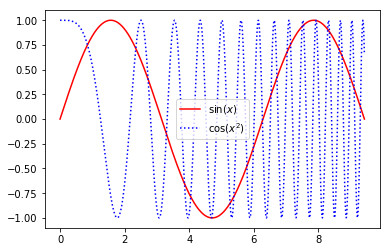

In [27]:
x =  np.linspace(0, 3*np.pi, 1001)
plt.plot(x, np.sin(x), "r-", label=r"$\sin(x)$")
plt.plot(x, np.cos(x**2), "b:", label=r"$\cos(x^2)$") #LaTeX
plt.legend()
plt.show()

# vector indexing

In [28]:
x = [1, 3, 2, 5, 4] # Python list
x

[1, 3, 2, 5, 4]

In [30]:
x[0:2] # slices

[1, 3]

In [33]:
x[0:1] # always returns a list (subsetting)

[1]

In [31]:
x[0] # scalar-based indexing (extraction)

1

In [32]:
x[-1]

4

In [34]:
x = np.array(x)
x

array([1, 3, 2, 5, 4])

In [35]:
# 1.scalar-based indexing
x[0]

1

In [36]:
x[-1]

4

In [37]:
# 2. slice-based:
x[::2]

array([1, 2, 4])

In [38]:
# 3. int-vector-based indexing:
x[ np.r_[0, -1, 0, 2] ]

array([1, 4, 1, 2])

In [40]:
# 4. bool-vector-based indexing:
print(x)
x[ np.r_[True, False, True, False, False] ]

[1 3 2 5 4]


array([1, 2])

In [41]:
x[x<3]

array([1, 2])

In [42]:
x<3

array([ True, False,  True, False, False])

In [43]:
# filtering!!!

In [44]:
x[(x>1)&(x<5)]

array([3, 2, 4])

In [45]:
x[ np.r_[1,0,1,0,0] ]

array([3, 1, 3, 1, 1])

In [46]:
x[ np.r_[1,0,1,0,0].astype(np.bool) ]

array([1, 2])

In [53]:
np.random.seed(6)
x = np.round(np.random.normal(size=20), 2)
x

array([-0.31,  0.73,  0.22, -0.9 , -2.49,  0.91,  1.13, -1.51,  1.64,
       -0.43,  2.63,  0.6 , -0.34,  1.24,  0.11,  0.13,  0.08, -0.16,
        0.63,  0.81])

* Print all values in $[-2,-1]\cup[1,2]$ $\Leftrightarrow$ $ |x| \in [1,2]$

In [55]:
x[ (x>=-2)&(x<=-1) | (x>=1)&(x<=2) ]

array([ 1.13, -1.51,  1.64,  1.24])

In [58]:
x[ (np.abs(x)>=1)&(np.abs(x)<=2)] 

array([ 1.13, -1.51,  1.64,  1.24])

* Print the number and the proportion of nonnegative elements in `x`.

In [59]:
np.sum(x>=0),       np.mean(x>=0)

(13, 0.65)

* Compute the arithmetic mean of absolute values.

In [61]:
np.mean(np.abs(x))

0.85

* Determine elements in `x` which are the least and the most distant from 0.

In [64]:
x[np.argmin(np.abs(x-0))], x[np.argmax(np.abs(x-0))]

(0.08, 2.63)

In [67]:
y = np.r_[1, -0.1, -1, -7]
distance_to_zero = np.abs(y-0)
distance_to_zero

array([1. , 0.1, 1. , 7. ])

In [69]:
np.argmin(distance_to_zero) # location (index) of minimum

1

In [70]:
# choose the element minimizing distance_to_zero
y[np.argmin(distance_to_zero) ]

-0.1

* Determine 3 elements in `x` which are the most distant from the arithmetic mean of `x`.

In [73]:
d = np.abs(x-np.mean(x)) # distance  from mean
d

array([0.546, 0.494, 0.016, 1.136, 2.726, 0.674, 0.894, 1.746, 1.404,
       0.666, 2.394, 0.364, 0.576, 1.004, 0.126, 0.106, 0.156, 0.396,
       0.394, 0.574])

In [74]:
d.argsort() # ordering permutation of d

array([ 2, 15, 14, 16, 11, 18, 17,  1,  0, 19, 12,  9,  5,  6, 13,  3,  8,
        7, 10,  4])

In [75]:
d.argsort()[-3:] # the indexes where we can find the 3 largest elems in d

array([ 7, 10,  4])

In [76]:
x[d.argsort()[-3:]]

array([-1.51,  2.63, -2.49])

* Create a vector `x2`, which is a version of `x` with all outliers removed,
i.e., all observations $x_i$ such that $x_i\not\in[Q_1-1.5IQR, Q_3+1.5IQR]$,
where $IQR=Q_3-Q_1$ denotes the interquartile range and $Q_1$ and $Q_3$
denote the 1st and 3rd sample quartiles, respectively.

In [81]:
q1, q3 = np.percentile(x, [25, 75])
iqr = q3-q1
x2 = x[(x<q1-1.5*iqr)|(x>q3+1.5*iqr)] # === ~((x>=q1-1.5*iqr)&(x<=q3+1.5*iqr))
x2

array([-2.49,  2.63])

* Create a vector `y` such that `y[i]` is equal to `"nonnegative"`
if the corresponding `x[i]>=0` and `"negative"` otherwise.

In [82]:
np.where(x>=0, "nonnegative", "negative") # if-else

array(['negative', 'nonnegative', 'nonnegative', 'negative', 'negative',
       'nonnegative', 'nonnegative', 'negative', 'nonnegative',
       'negative', 'nonnegative', 'nonnegative', 'negative',
       'nonnegative', 'nonnegative', 'nonnegative', 'nonnegative',
       'negative', 'nonnegative', 'nonnegative'], dtype='<U11')

In [89]:
y = np.full(x.shape, "nonnegative")
y[x<0] = "negative"
y

array(['negative', 'nonnegative', 'nonnegative', 'negative', 'negative',
       'nonnegative', 'nonnegative', 'negative', 'nonnegative',
       'negative', 'nonnegative', 'nonnegative', 'negative',
       'nonnegative', 'nonnegative', 'nonnegative', 'nonnegative',
       'negative', 'nonnegative', 'nonnegative'], dtype='<U11')

In [91]:
(x>=0).astype(np.int)

array([0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1])

In [92]:
np.array(["negative","nonnegative"])[(x>=0).astype(np.int)]

array(['negative', 'nonnegative', 'nonnegative', 'negative', 'negative',
       'nonnegative', 'nonnegative', 'negative', 'nonnegative',
       'negative', 'nonnegative', 'nonnegative', 'negative',
       'nonnegative', 'nonnegative', 'nonnegative', 'nonnegative',
       'negative', 'nonnegative', 'nonnegative'], dtype='<U11')

In [93]:
y = np.r_[0,1,2,1,1,1,2,1,0]
np.array(["red", "green", "blue"])[y]

array(['red', 'green', 'blue', 'green', 'green', 'green', 'blue', 'green',
       'red'], dtype='<U5')

In [95]:
np.full(x.shape, "nonnegative").astype("<U100")

array(['nonnegative', 'nonnegative', 'nonnegative', 'nonnegative',
       'nonnegative', 'nonnegative', 'nonnegative', 'nonnegative',
       'nonnegative', 'nonnegative', 'nonnegative', 'nonnegative',
       'nonnegative', 'nonnegative', 'nonnegative', 'nonnegative',
       'nonnegative', 'nonnegative', 'nonnegative', 'nonnegative'],
      dtype='<U100')

* Create a vector `y` such that `y[i]` is equal to `"small"` if
the corresponding `x[i]<-1`, `"large"` if `x[i]>1` and `"medium"` otherwise.

In [83]:
np.where(x>=1, "large", np.where(x<=-1, "small", "medium"))

# for xi in x:
#  if xi >= 1: output("large")
#    else:
#        if xi<= -1: output("small")
#        else: output("medium")

array(['medium', 'medium', 'medium', 'medium', 'small', 'medium', 'large',
       'small', 'large', 'medium', 'large', 'medium', 'medium', 'large',
       'medium', 'medium', 'medium', 'medium', 'medium', 'medium'],
      dtype='<U6')

Extra exercise:
    Write a function to compute the $k$-moving average
of a given vector `x` of length $n$, where $k=2l+1$ for some $l$.
Return a vector `t` of length $n$ with the $l$ first and $l$ last observations
set to `NaN`. Each other $t_i$ should be equal to the arithmetic mean
of $x_{i-l},\dots,x_i,\dots,x_{i+l}$.

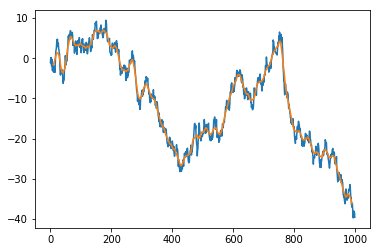

In [103]:
def moving_average(x, l):
    k = 2*l+1
    y =  np.convolve(x, np.ones(k)/k, mode='same')
    y[:l] = np.nan
    y[-l:] = np.nan
    return y



np.random.seed(123)
x = np.cumsum(np.random.randn(1000))
plt.plot(x)
#plt.plot(moving_average(x, 1))
plt.plot(moving_average(x, 9))
plt.show()

#https://en.wikipedia.org/wiki/Kernel_(image_processing)

In [107]:
x = np.r_[1, 3, 5, 2, -1, -2, -3]
l = 1
k = 2*l+1
# [3, 3.33, 2, -0.33, -2]
np.cumsum(x)

array([ 1,  4,  9, 11, 10,  8,  5])

In [113]:
(np.cumsum(x)[k:]-np.cumsum(x)[:-k])/k # more or less

array([ 3.33333333,  2.        , -0.33333333, -2.        ])

Extra 2: Write a function that determines the mode, i.e., the most frequently occurring
value in a given vector of "small" non-negative integers (say, < 10,000). If the mode is not-unique, return a randomly chosen one.
Hint: Find a built-in function that counts the number of occurrences of each
unique value in `t`.



In [148]:
np.random.seed(123)
#x = np.random.randint(4, 10, 10000)
x = np.r_[1,1,2,3,2,1,3,3,2,3,2,3,3,2,2, 10, 10, 6]

In [149]:
np.unique(x)#, return_counts=True)

array([ 1,  2,  3,  6, 10])

In [150]:
vals, cnts = np.unique(x, return_counts=True)
vals, cnts

(array([ 1,  2,  3,  6, 10]), array([3, 6, 6, 1, 2]))

In [151]:
np.argmax(cnts),  vals[np.argmax(cnts)] # the smallest mode  (if not unique)
# where is the maximum of cnts (the index of maximum)

(1, 2)

In [152]:
# choose random of the modes
vals[cnts == cnts.max()]

array([2, 3])

In [153]:
np.random.choice(vals[cnts == cnts.max()], 1 )

array([2])

In [154]:
np.bincount(x)

array([0, 3, 6, 6, 0, 0, 1, 0, 0, 0, 2])

In [155]:
np.argmax(np.bincount(x))

2

In [159]:
bc = np.bincount(x)
np.where(bc == np.max(bc))

(array([2, 3]),)

We have 4 vector indexing schemes:

1.    scalar-based
2.    slice
3.    int-vector
4.    bool-vector

**ONLY slice-based indexing returns a view on an existing array**

In [160]:
def mod(x):
    x *= 2
    return x

In [167]:
x = [1,2,3]
print(x)
print(mod(x))
print(x) # because pass-by-reference

[1, 2, 3]
[1, 2, 3, 1, 2, 3]
[1, 2, 3, 1, 2, 3]


In [166]:
x = np.r_[1,2,3]
print(x)
print(mod(x))
print(x) # because pass-by-reference

[1 2 3]
[2 4 6]
[2 4 6]


In [168]:
x = np.r_[1,2,3]
print(x)
print(mod(       x[np.r_[0,-1,0]]      ))
print(x) # because pass-by-reference

[1 2 3]
[2 6 2]
[1 2 3]


In [169]:
x = np.r_[1,2,3]
print(x)
print(mod(       x[ x>1 ]      ))
print(x) # because pass-by-reference

[1 2 3]
[4 6]
[1 2 3]


In [170]:
x = np.r_[1,2,3]
print(x)
print(mod(       x[ ::2 ]      ))
print(x) # because pass-by-reference

[1 2 3]
[2 6]
[2 2 6]


In [171]:
x = np.r_[1,2,3]
print(x)
print(mod(       x[ ::2 ].copy()      ))
print(x) # because pass-by-reference

[1 2 3]
[2 6]
[1 2 3]


In [172]:
x.dtype

dtype('int64')

In [173]:
x.ctypes.data

94180465615488

In [175]:
x.strides

(8,)

In [177]:
x[1::2].ctypes.data, x[1::2].strides

(94180465615496, (16,))

In [178]:
x[ np.r_[0, 2] ].ctypes.data, x[np.r_[0, 2]].strides

(94180469721088, (8,))

# Matrix indexing

A -  matrix

`A[r,c] === A[ (r,c) ]`


r \ c    | scalar       | slice        | int-vec      | bool-vec     
---------|--------------|--------------|--------------|--------------
scalar   |  scalar      | vector(V)    | vector       | vector             
slice    |   x          | matrix(V)    | matrix       | matrix
int-vec  |   x          |  x           | vectorized   | vectorized              
bool-vec |   x          |  x           |   x          |  vectorized            

(V) -- a view on an existing array

In [179]:
A = np.r_[1:13].reshape(3,4)
A

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [180]:
A[0,-1] # 1st row, last col

4

In [182]:
# scalar-slice
A[0, ::2] # every 2nd elem in 1st row

array([1, 3])

In [185]:
A[::-1, -1] # reverse the order of elems in last col

array([12,  8,  4])

In [186]:
# slice-slice
A[::2, ::-1] # every 2nd row, cols reversed 

array([[ 4,  3,  2,  1],
       [12, 11, 10,  9]])

In [187]:
A[::2, ::-1].strides

(64, -8)

In [188]:
A.strides

(32, 8)

In [189]:
# scalar - int-vec
A[-1, np.r_[0, -1, 0, 2] ]

array([ 9, 12,  9, 11])

In [191]:
# scalar - bool-vec
A[ np.r_[True, False, True], 0 ]

array([1, 9])

In [192]:
# slice - int-vect

In [193]:
A[ ::2, np.r_[0, -1, 0, 2] ]

array([[ 1,  4,  1,  3],
       [ 9, 12,  9, 11]])

In [195]:
A[ :1, np.r_[0] ]

array([[1]])

In [196]:
A[:, np.r_[0,-1] ]

array([[ 1,  4],
       [ 5,  8],
       [ 9, 12]])

In [198]:
# slice - bool-vect
np.mean(A, axis=0)

array([5., 6., 7., 8.])

In [199]:
A[:, np.mean(A, axis=0)>6]

array([[ 3,  4],
       [ 7,  8],
       [11, 12]])

In [200]:
A[ np.r_[0, 1], np.r_[-1, 0] ]

array([4, 5])

In [202]:
A[ np.r_[0,1,0], np.r_[0,1] ]

IndexError: shape mismatch: indexing arrays could not be broadcast together with shapes (3,) (2,) 

In [204]:
A[ np.r_[0,1].reshape(-1,1), np.r_[-1,0].reshape(1,-1) ]

array([[4, 1],
       [8, 5]])

In [205]:
A[ np.r_[0,1].reshape(-1,1), np.r_[-1,0,2].reshape(1,-1) ]

array([[4, 1, 3],
       [8, 5, 7]])

In [206]:
np.r_[0,1].reshape(-1,1), np.r_[-1,0,2].reshape(1,-1) 

(array([[0],
        [1]]), array([[-1,  0,  2]]))

In [207]:
np.ix_(np.r_[0,1], np.r_[-1,0,2])

(array([[0],
        [1]]), array([[-1,  0,  2]]))

In [208]:
A[np.ix_(np.r_[0,1], np.r_[-1,0,2])]

array([[4, 1, 3],
       [8, 5, 7]])

In [209]:
x = np.r_[1, 10, 100]
y = np.r_[1,  2,   3]
x*y

array([  1,  20, 300])

In [210]:
x.reshape(-1,1)

array([[  1],
       [ 10],
       [100]])

In [211]:
y.reshape(1,-1)

array([[1, 2, 3]])

In [215]:
x.reshape(-1,1) * y.reshape(1,-1)

array([[ 0, -1, -2],
       [ 9,  8,  7],
       [99, 98, 97]])

# Our Own 1-layer NNet + TensorFlow

(Marco will elaborate on this in the future)

In [216]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf



import pandas as pd
import numpy as np
import os, os.path, gzip, tempfile, urllib.request

def load_mnist(kind='train', dataset='zalando'): # 'train' or 't10k'
    """based on https://github.com/zalandoresearch/fashion-mnist/blob/master/utils/mnist_reader.py"""
    
    if dataset=='zalando':
        url_base = 'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/'
    else:
        url_base = 'http://yann.lecun.com/exdb/mnist/'
        
    url_labels = url_base+'%s-labels-idx1-ubyte.gz'%kind
    url_images = url_base+'%s-images-idx3-ubyte.gz'%kind

    file_labels = os.path.join(tempfile.gettempdir(), '%s-labels-idx1-ubyte.gz'%kind)
    file_images = os.path.join(tempfile.gettempdir(), '%s-images-idx3-ubyte.gz'%kind)
    
    if not os.path.exists(file_labels):
        urllib.request.urlretrieve(url_labels, file_labels)
        
    if not os.path.exists(file_images):
        urllib.request.urlretrieve(url_images, file_images)
    
    with gzip.open(file_labels, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(file_images, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    assert len(images.shape)==2
    assert len(labels.shape)==1
    assert images.shape[0] == labels.shape[0]
    assert images.shape[1] == 28*28
    return images, labels


In [217]:
X_train, Y_train = load_mnist('train')
X_test,  Y_test  = load_mnist('t10k')

In [218]:
X_train.shape

(60000, 784)

In [221]:
# each row == represents a 28*28==784 pixel image
np.percentile(X_train[0,:], [0, 25, 50, 75, 100])

array([  0.,   0.,  44., 210., 255.])

In [222]:
# scale brightness from {0...255} -> [0,1]
X_train = X_train/255
X_train = X_test/255

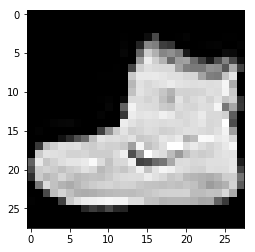

In [227]:
plt.imshow(X_train[0,:].reshape(28,28), cmap='gray')
plt.show()

In [228]:
Y_train[0]

9

In [229]:
#https://github.com/zalandoresearch/fashion-mnist

In [230]:
Y_train.shape

(60000,)

In [231]:
np.unique(Y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

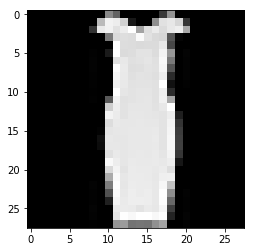

In [232]:
plt.imshow(X_test[666,:].reshape(28,28), cmap='gray')
plt.show()

In [233]:
Y_test[666]

3

In [234]:
X_test.shape

(10000, 784)

In [235]:
Y_train[:5]

array([9, 0, 0, 3, 0], dtype=uint8)

In [242]:
def one_hot_encode(Y):
    k = np.max(Y)+1
    return np.eye(k)[Y,:]

def one_hot_encode2(Y):
    k = np.max(Y)+1
    Y2 = np.zeros((len(Y), k))
    Y2[np.arange(len(Y)), Y] = 1
    return Y2
    
Y_train2 = one_hot_encode(Y_train)
Y_test2  = one_hot_encode(Y_test)

print(Y_train[:5])
print(Y_train2[:5, :])

[9 0 0 3 0]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [243]:
%timeit (one_hot_encode(Y_train))
%timeit (one_hot_encode2(Y_train))

793 µs ± 64.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
484 µs ± 2.79 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [245]:
# extra:
def one_hot_decode(Y2):
    return np.argmax(Y2, axis=1)
    
assert np.all(one_hot_decode(one_hot_encode(Y_train))==Y_train)

In [239]:
I = np.eye(3)
I

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [240]:
I[ np.r_[0, 2, 2, 2, 0, 1], :]

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [260]:
X_train_subset = X_train[:6000,:]
Y_train_subset = Y_train[:6000]
X_test_subset = X_test[:100,]
Y_test_subset = Y_test[:100]

In [257]:
import sklearn.neighbors
knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_subset, Y_train_subset)


Y_pred = knn.predict(X_test_subset)

In [248]:
Y_pred

array([9, 2, 1, 1, 0, 1, 4, 6, 5, 7, 4, 5, 5, 3, 4, 1, 2, 2, 8, 0, 2, 7,
       7, 9, 1, 2, 4, 0, 9, 3, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 0, 1, 0, 9,
       4, 9, 2, 1, 2, 2, 4, 2, 5, 8, 2, 2, 8, 6, 8, 0, 7, 7, 8, 5, 1, 1,
       0, 3, 7, 8, 7, 0, 2, 6, 2, 3, 1, 2, 8, 4, 1, 8, 5, 9, 5, 0, 6, 2,
       0, 2, 5, 0, 6, 7, 1, 8, 0, 1, 2, 2], dtype=uint8)

In [249]:
Y_test_subset

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 4, 8, 0, 2, 5,
       7, 9, 1, 4, 6, 0, 9, 3, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 6, 1, 3, 7,
       6, 7, 2, 1, 2, 2, 4, 4, 5, 8, 2, 2, 8, 4, 8, 0, 7, 7, 8, 5, 1, 1,
       2, 3, 9, 8, 7, 0, 2, 6, 2, 3, 1, 2, 8, 4, 1, 8, 5, 9, 5, 0, 3, 2,
       0, 6, 5, 3, 6, 7, 1, 8, 0, 1, 4, 2], dtype=uint8)

In [258]:
np.mean(Y_pred == Y_test_subset)

0.81

In [259]:
import sklearn.metrics
sklearn.metrics.accuracy_score(Y_pred, Y_test_subset)

0.81

In [253]:
print(sklearn.metrics.classification_report(Y_pred, Y_test_subset))

              precision    recall  f1-score   support

           0       1.00      0.62      0.76        13
           1       1.00      1.00      1.00        13
           2       0.93      0.72      0.81        18
           3       0.67      1.00      0.80         6
           4       0.50      0.71      0.59         7
           5       0.89      0.89      0.89         9
           6       0.38      0.60      0.46         5
           7       0.73      0.80      0.76        10
           8       1.00      1.00      1.00        12
           9       0.83      0.71      0.77         7

   micro avg       0.81      0.81      0.81       100
   macro avg       0.79      0.81      0.78       100
weighted avg       0.85      0.81      0.82       100



In [273]:
import scipy.spatial.distance

def mode(Y):
    vals, cnts = np.unique(Y, return_counts=True)
    return np.random.choice(vals[cnts==cnts.max()], 1)

def knn(X_train, Y_train, X_test, n_neighbors):
    n_samples = X_test.shape[0]
    Y_pred = np.empty(n_samples, dtype=Y_train.dtype) # Y_pred of the same dtype as Y_train
    #for each digit in X_test:
    #    compute the distance between the digit and all digits in X_train
    #    choose the indexes of n_neighbors smallest distances
    #    choose the corresponding elements in Y_train
    #    compute the mode of these elements 
    #    output the mode to Y_pred
    
    for i in range(n_samples):
        #d = np.sqrt(np.sum((X_test[i,:]-X_train)**2, axis=1))
        #d = scipy.spatial.distance.cdist(X_train, X_test[i,:].reshape(1,-1)).reshape(-1)
        d = np.linalg.norm(X_test[i,:]-X_train, axis=1)
        #print(np.argsort(d).shape)
        assert d.shape[0] == X_train.shape[0]
        indexes_neighbors = np.argsort(d)[:n_neighbors]
        Y_pred[i] = mode(Y_train[indexes_neighbors])
    return Y_pred
    
Y_pred = knn(X_train_subset, Y_train_subset, X_test_subset, 3)
print(sklearn.metrics.accuracy_score(Y_pred, Y_test_subset))

0.81


In [274]:
60_000*10_000*8/1e9

4.8

In [275]:
# Multinomial logistic regression a.k.a. 1-layer nnet

In [276]:
def softmax(r):
    r2 = np.exp(r)
    return r2/np.sum(r2)

In [286]:
r = np.r_[ 0, 0, 0.1 ]
np.round(softmax( r ), 4)

array([0.322 , 0.322 , 0.3559])

In [288]:
C = np.random.randn(785, 10)

In [290]:
np.round(softmax(np.r_[1.0, X_test[0,:]].reshape(1,-1) @ C), 3)

array([[0.   , 0.006, 0.   , 0.   , 0.   , 0.   , 0.001, 0.   , 0.   ,
        0.992]])